In [ ]:
import pandas as pd

passageiros = pd.read_csv('/content/5_Fileiras_Zero_Esquerda_NAO_Zero_Direita_NAO.csv')
#passageiros = pd.read_csv('/content/Passageiros.csv')

In [ ]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 20

In [ ]:
passageiros

,row ID,Perfil_Combinado_str,Perfil_Combinado_Binned_int,dens_mediana_dz4_dz3,fileira_maior_qtde_sorteado_int,target
0,1996-04-29 [4 17 37 38 47 53],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_D_31_...,2,0,4,[1 1 0 2 1 1]
1,1996-06-10 [2 16 23 27 47 53],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_C_21_...,31,3,3,[1 1 2 0 1 1]
2,1997-02-09 [7 13 33 35 43 55],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_D_31_...,2,1,4,[1 1 0 2 1 1]
3,1997-02-16 [6 16 21 44 57 58],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_C_21_...,13,22,6,[1 1 1 0 1 2]
4,1997-05-04 [8 18 29 42 44 59],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_C_21_...,7,12,5,[1 1 1 0 2 1]
...,...,...,...,...,...,...
227,2023-05-24 [1 13 34 39 50 52],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_D_31_...,2,4,4,[1 1 0 2 1 1]
228,2023-06-10 [4 18 37 38 46 60],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_D_31_...,2,0,4,[1 1 0 2 1 1]
229,2023-08-19 [9 19 22 24 50 60],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_C_21_...,31,1,3,[1 1 2 0 1 1]
230,2023-12-02 [7 11 27 41 56 59],bin_A_1_a_10_1x_e_bin_B_11_a_20_1x_e_bin_C_21_...,13,13,6,[1 1 1 0 1 2]


In [ ]:
passageiros = passageiros[['data', 'dezena_1', 'dezena_2', 'dezena_3', 'dezena_4', 'dezena_5', 'dezena_6', 'ATUAL_soma' ]]

In [ ]:
passageiros['data'] = pd.to_datetime(passageiros['data'])
passageiros['data'] = pd.to_numeric(passageiros['data'])
#passageiros = pd.DataFrame(passageiros).set_index('data')


In [ ]:
passageiros.dtypes

data        int64
dezena_1    int64
dtype: object

<Axes: xlabel='data', ylabel='dezena_1'>

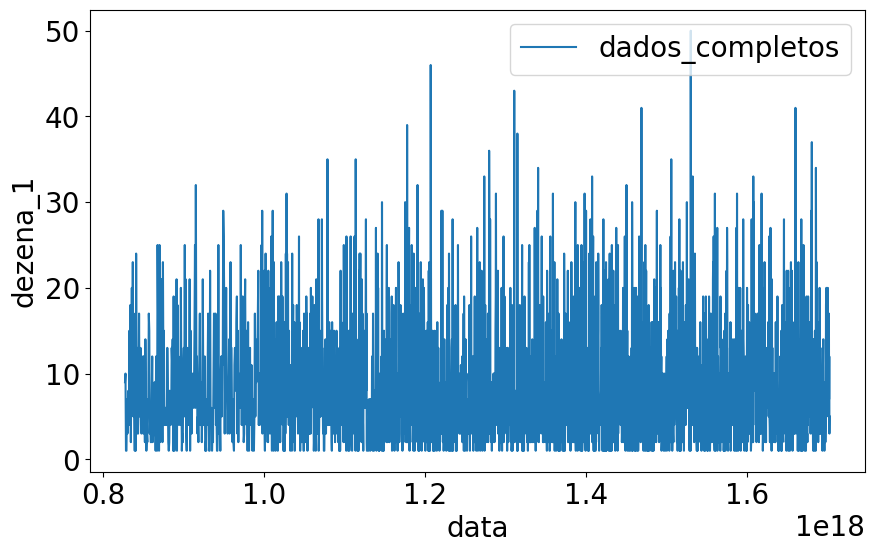

In [ ]:
import seaborn as sns
sns.lineplot(x='data', y='dezena_1', data = passageiros, label='dados_completos')

In [ ]:
passageiros

,data,dezena_1
0,827107200000000000,9
1,827712000000000000,10
2,828316800000000000,1
3,828921600000000000,1
4,829526400000000000,7
...,...,...
2657,1701302400000000000,17
2658,1701475200000000000,7
2659,1701734400000000000,12
2660,1701907200000000000,3


# PRE-PROCESSAMENTO

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [ ]:
dados_escalados = sc.transform(passageiros)

x = dados_escalados[:,0]
y = dados_escalados[:,1]

x.shape, y.shape


((2662,), (2662,))

Text(0.5, 0, 'data')

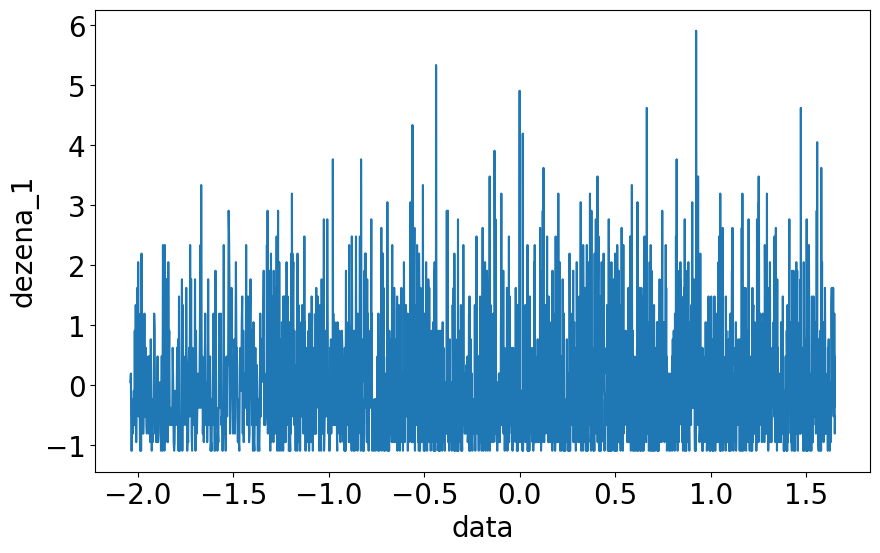

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(x=x, y=y, data = dados_escalados)
plt.ylabel('dezena_1')
plt.xlabel('data')

# TRAINING AND TESTING

In [ ]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

x_treino.shape, y_treino.shape

((2395,), (2395,))

<Axes: >

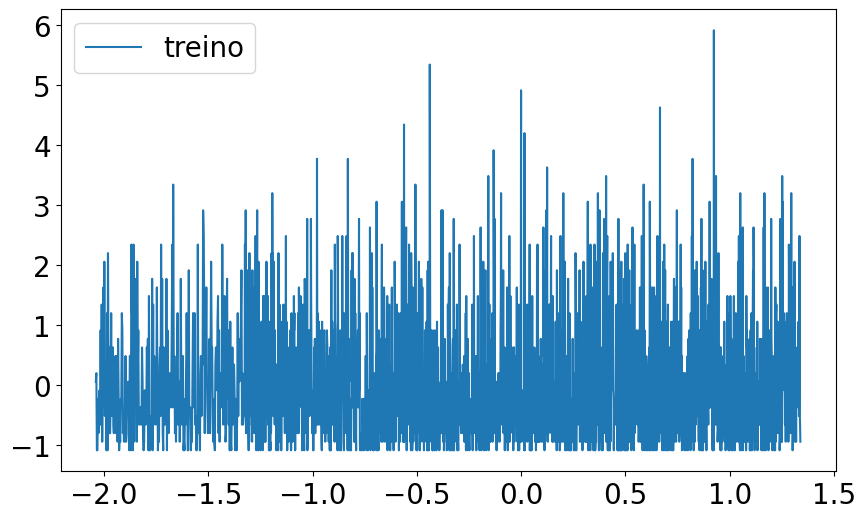

In [ ]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')

In [ ]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

x_teste.shape, y_teste.shape

((267,), (267,))

Text(0.5, 0, 'data')

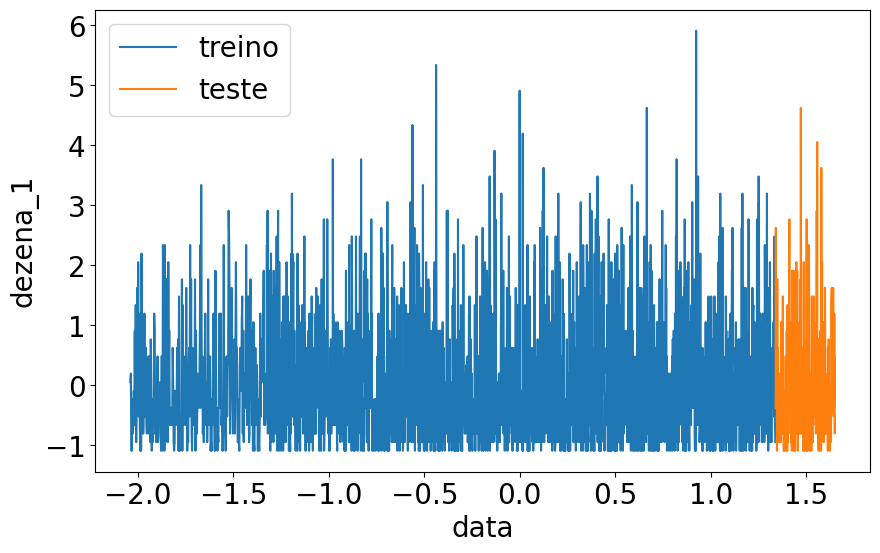

In [ ]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
plt.ylabel('dezena_1')
plt.xlabel('data')

# REGRESSOR 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
regressor = Sequential()

In [ ]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones', activation='linear', use_bias=False))
regressor.compile(loss='mean_squared_error', optimizer='Adam')
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Predict TREINO

In [ ]:
regressor.fit(x_treino, y_treino)
y_predict = regressor.predict(x_treino)

y_predict.shape
y_predict[:,0]

75/75 [==============================] - 0s 1ms/step


array([-1.8916155, -1.8892496, -1.8868836, ...,  1.2391442,  1.2401581,
        1.2415102], dtype=float32)

<Axes: >

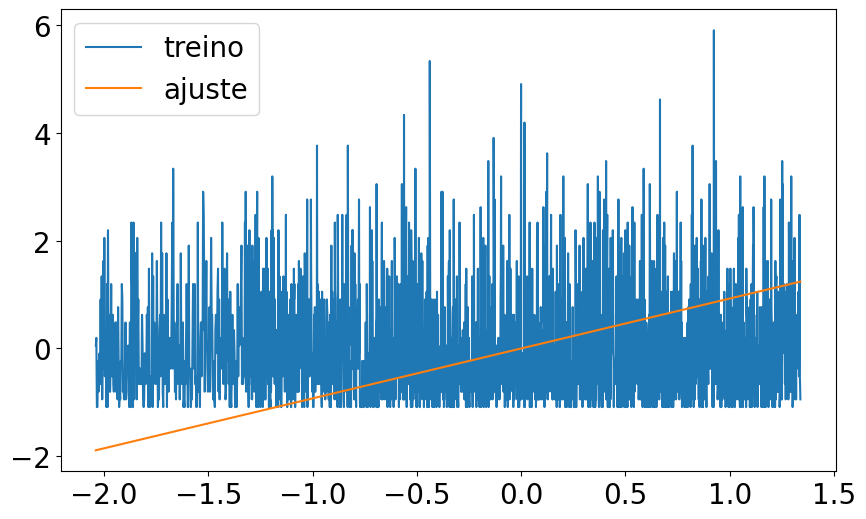

In [ ]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste')

In [ ]:
d = {'data':x_treino, 'dezena_1':y_predict[:,0]}

resultados = pd.DataFrame(d)

# TREINO - Revertendo SCALER

In [ ]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)

resultado_transf.columns = ['data', 'dezena_1']

<Axes: xlabel='data', ylabel='dezena_1'>

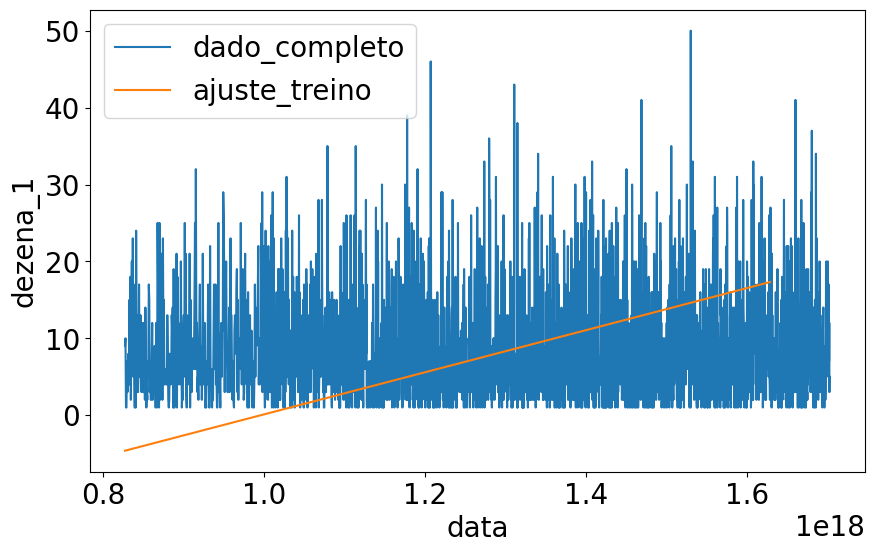

In [ ]:
sns.lineplot(x='data', y='dezena_1', data=passageiros, label='dado_completo')
sns.lineplot(x='data', y='dezena_1', data=resultado_transf, label='ajuste_treino')

# Predict TESTE

In [ ]:
y_predict_teste = regressor.predict(x_teste)

9/9 [==============================] - 0s 2ms/step


In [ ]:
d = {'data':x_teste, 'dezena_1': y_predict_teste[:,0]}

resultados_teste = pd.DataFrame(data=d)

# TESTE - Revertendo SCALER

In [ ]:
resultados_transf_teste = sc.inverse_transform(resultados_teste)
resultados_transf_teste = pd.DataFrame(resultados_transf_teste)
resultados_transf_teste.columns = ['data', 'dezena_1']

<Axes: xlabel='data', ylabel='dezena_1'>

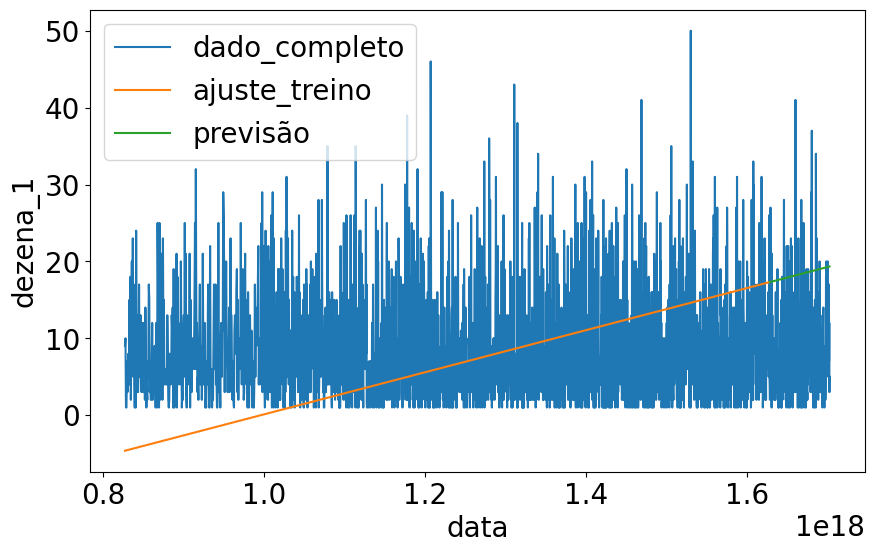

In [ ]:
sns.lineplot(x='data', y='dezena_1', data=passageiros, label='dado_completo')
sns.lineplot(x='data', y='dezena_1', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='data', y='dezena_1', data=resultados_transf_teste, label='previsão')

# REGRESSOR 2

In [ ]:
regressor2 = Sequential()
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False)) # Primeira camada escondida com 8 neuronios, input_dim é camada entrada com 1 feature
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False)) # Segunda camada escondida
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)) # Camada de saída
regressor2.compile(loss='mean_squared_error', optimizer='Adam')
regressor2.summary()
regressor2.fit(x_treino, y_treino, epochs=200)

y_predict = regressor2.predict(x_treino)
y_predict_teste = regressor2.predict(x_teste)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 8)                 64        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
75/75 [==============================] - 1s 2ms/step - loss: 1.0065
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 1.0069
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 1.0065
Epoch 4/200
75/75 [=======================

<Axes: >

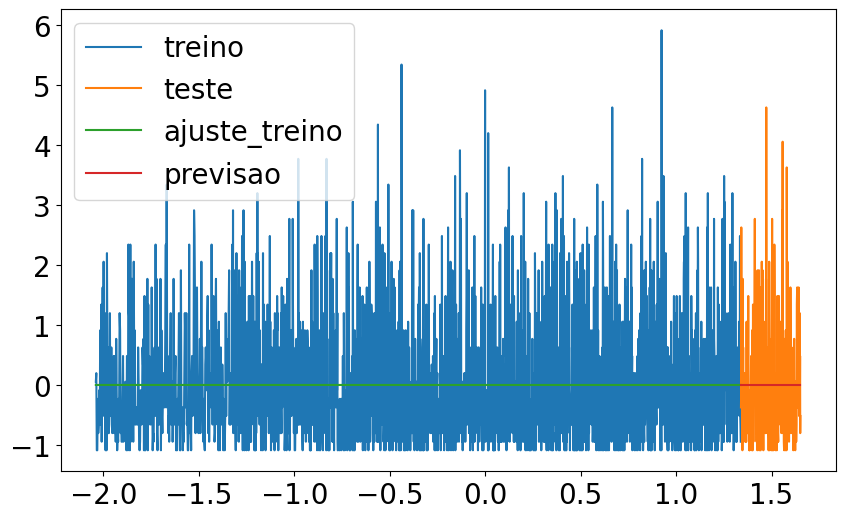

In [ ]:
sns.lineplot(x=x_treino,y=y_treino, label='treino')
sns.lineplot(x=x_teste,y=y_teste, label='teste')
sns.lineplot(x=x_treino,y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:,0], label='previsao')

In [ ]:
import numpy as np

vetor = pd.DataFrame(y_treino)[0]

In [ ]:
vetor.shape

(2395,)

In [ ]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [ ]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [ ]:
y_treino_novo[0:5]

array([ 0.19684009, -1.08884551, -1.08884551, -0.23172178, -0.8031376 ])

In [ ]:
vetor2 = pd.DataFrame(y_teste)[0]

In [ ]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [ ]:
y_teste_novo[0:10]

array([ 0.62540195, -0.66028365, -0.94599156, -0.23172178, -0.23172178,
        0.05398613, -0.8031376 , -0.66028365,  0.19684009, -0.37457574])

# REGRESSOR 3

In [ ]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1,kernel_initializer='ones',activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
75/75 [==============================] - 1s 2ms/step - loss: 1.0077
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0090
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0062
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0085
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0063
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0102
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0080
Epoch 8/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0070
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0070
Epoch 10/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0086
Epoch 11/100
75/75 [==============================] - 0s 3ms/step - loss: 1.0084
Epoch 12/100
75/75 [==============================] - 0s 3ms/step - loss: 1.0056
Epoch 13/100
75/75 [=================

In [ ]:
y_predict_novo = regressor3.predict(x_treino_novo)

75/75 [==============================] - 0s 2ms/step


<Axes: xlabel='data', ylabel='0'>

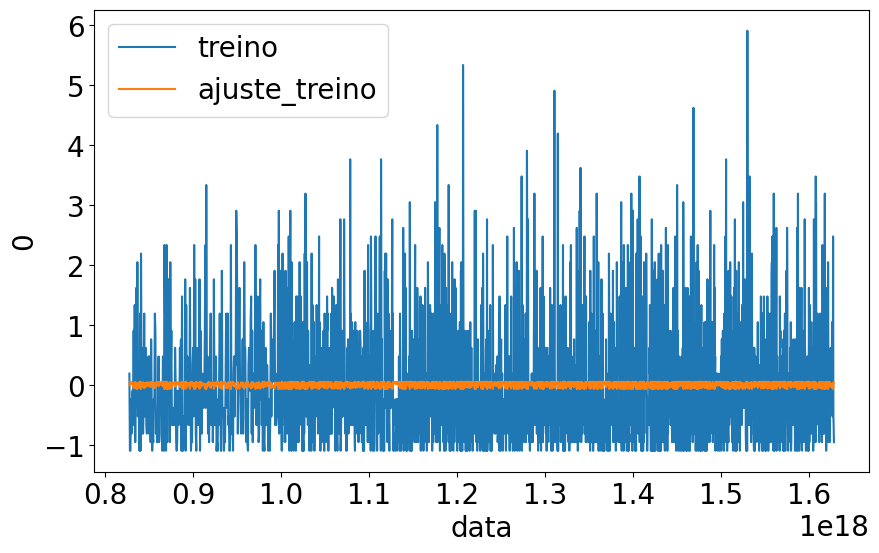

In [ ]:
sns.lineplot(x='data',y=y_treino_novo,data=passageiros[1:len(x_treino_novo) + 1], label='treino')
sns.lineplot(x='data',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:len(x_treino_novo) + 1], label='ajuste_treino')

In [ ]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [ ]:
x_treino_novo[0:5]

array([[ 0.05398613,  0.19684009, -1.08884551, -1.08884551],
       [ 0.19684009, -1.08884551, -1.08884551, -0.23172178],
       [-1.08884551, -1.08884551, -0.23172178, -0.8031376 ],
       [-1.08884551, -0.23172178, -0.8031376 , -0.66028365],
       [-0.23172178, -0.8031376 , -0.66028365, -0.08886782]])

In [ ]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

# REGRESSOR 4

In [ ]:
regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=4,kernel_initializer='ones',activation='linear',use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

Epoch 1/300
75/75 [==============================] - 1s 2ms/step - loss: 1.0098
Epoch 2/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0107
Epoch 3/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0101
Epoch 4/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0110
Epoch 5/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0094
Epoch 6/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0099
Epoch 7/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0106
Epoch 8/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0095
Epoch 9/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0086
Epoch 10/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0087
Epoch 11/300
75/75 [==============================] - 0s 3ms/step - loss: 1.0089
Epoch 12/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0104
Epoch 13/300
75/75 [=================

In [ ]:
y_predict_novo = regressor4.predict(x_treino_novo)

75/75 [==============================] - 0s 2ms/step


In [ ]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

9/9 [==============================] - 0s 3ms/step


In [ ]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [ ]:
resultado = pd.DataFrame(y_predict_teste)[0]

<Axes: xlabel='data'>

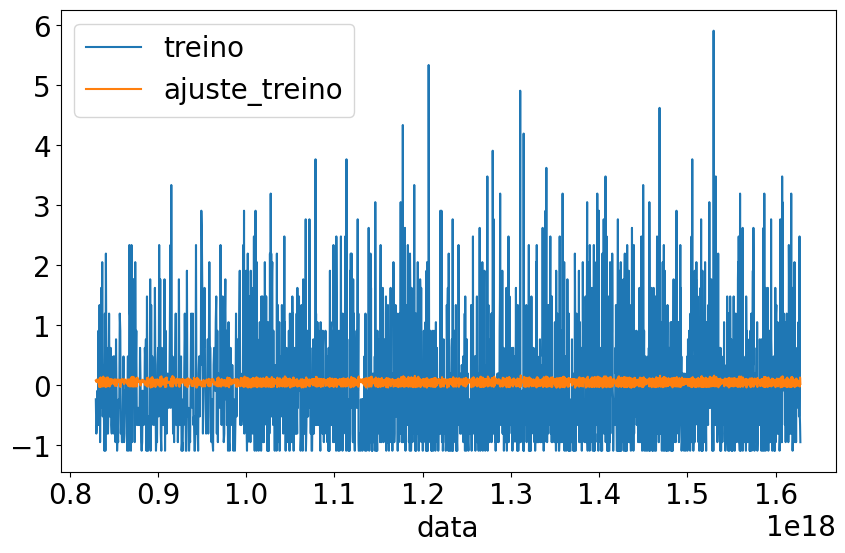

In [ ]:
sns.lineplot(x='data', y=y_treino_novo, data=passageiros[4:len(x_treino_novo)+4], label='treino')
sns.lineplot(x='data', y=resultado_treino.values, data=passageiros[4:len(x_treino_novo)+4], label='ajuste_treino')

In [ ]:
#bike = pd.read_csv('/content/bicicletas.csv')
#bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

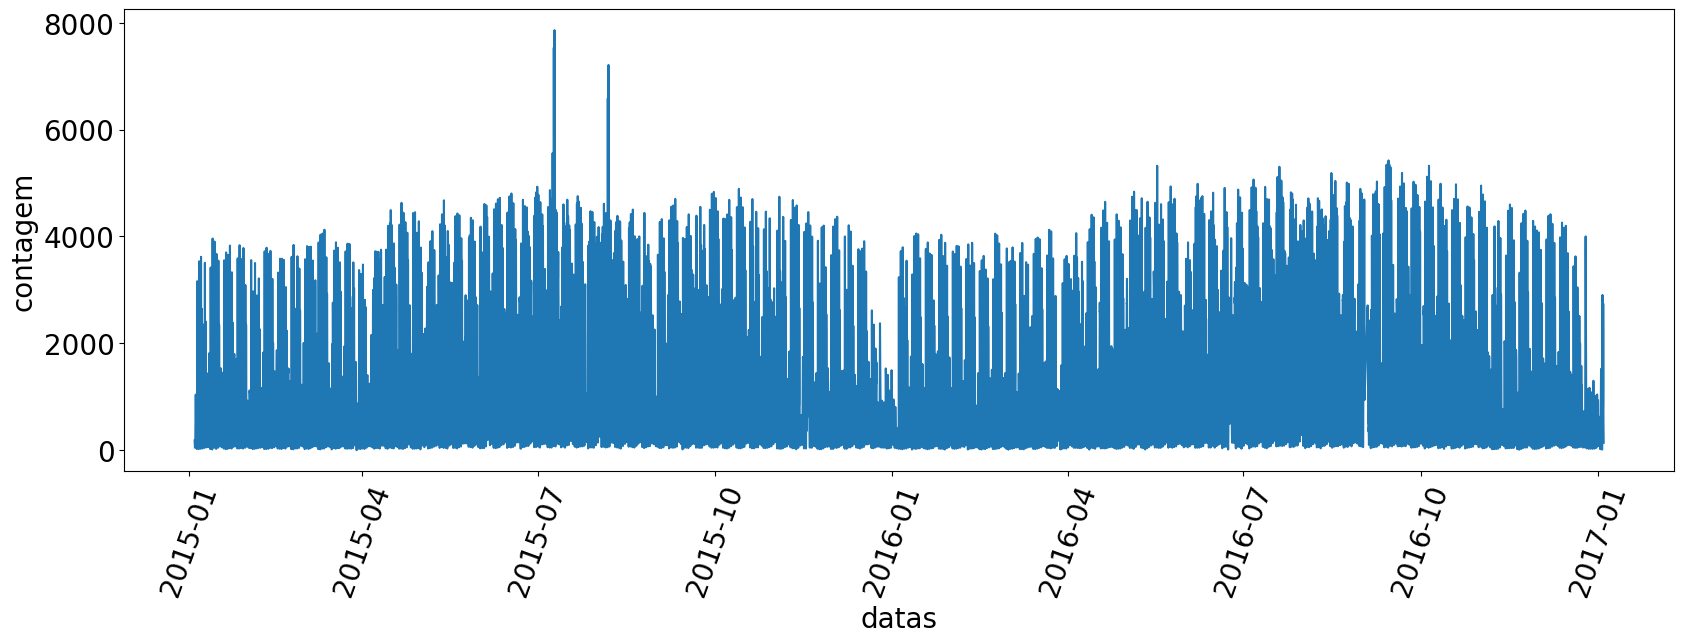

In [ ]:
mpl.rcParams['figure.figsize'] = (20,6)
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()

bike = passageiros

In [ ]:
sc2.fit(bike['dezena_1'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['dezena_1'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [ ]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([6.0e+17, 8.0e+17, 1.0e+18, 1.2e+18, 1.4e+18, 1.6e+18, 1.8e+18]),
 [Text(6e+17, 0, '0.6'),
  Text(8e+17, 0, '0.8'),
  Text(1e+18, 0, '1.0'),
  Text(1.2e+18, 0, '1.2'),
  Text(1.4e+18, 0, '1.4'),
  Text(1.6e+18, 0, '1.6'),
  Text(1.8e+18, 0, '1.8')])

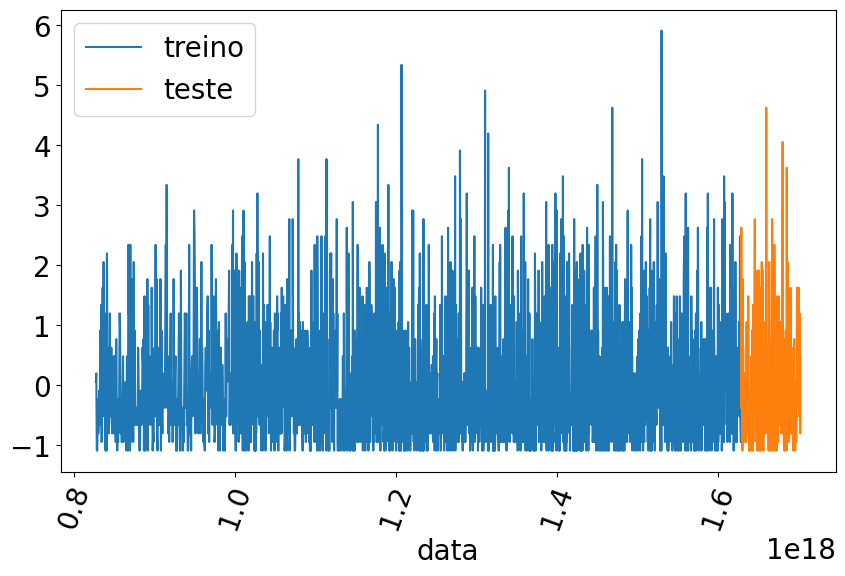

In [ ]:
sns.lineplot(x='data', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='data', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 30)

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 30)

In [ ]:
xtreino_novo

array([[ 0.05398613,  0.19684009, -1.08884551, ..., -0.8031376 ,
        -0.23172178,  1.19681777],
       [ 0.19684009, -1.08884551, -1.08884551, ..., -0.23172178,
         1.19681777, -0.51742969],
       [-1.08884551, -1.08884551, -0.23172178, ...,  1.19681777,
        -0.51742969, -0.51742969],
       ...,
       [ 1.62537964, -1.08884551, -0.66028365, ..., -0.51742969,
         0.33969404,  2.48250337],
       [-1.08884551, -0.66028365, -0.51742969, ...,  0.33969404,
         2.48250337, -0.51742969],
       [-0.66028365, -0.51742969, -0.66028365, ...,  2.48250337,
        -0.51742969, -0.66028365]])

# RECORRENTE (LSTM)

In [ ]:
# 3 attributos

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1)) # no caso é o tempo

In [ ]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [ ]:
recorrente = Sequential()

In [ ]:
from tensorflow.keras.layers import LSTM
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [ ]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=200)

In [ ]:
recorrente.save('MusicalInstrumentReviews.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# converting categorical variables in y_train to numerical variables
y_test_dummies = pd.get_dummies(ytreino_novo).values
print('Shape of Label tensor: ', y_test_dummies.shape)


# model evaluation
from keras.models import load_model

model = load_model('MusicalInstrumentReviews.h5')
scores = model.evaluate(xteste_novo, yteste_novo)

Shape of Label tensor:  (2365, 42)
8/8 [==============================] - 1s 14ms/step - loss: 1.5279


In [ ]:
scores

TypeError: ignored

In [ ]:
LSTM_accuracy = scores - 100

print(f'Accuracy = {LSTM_accuracy}')

Accuracy = -98.47210669517517


In [ ]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


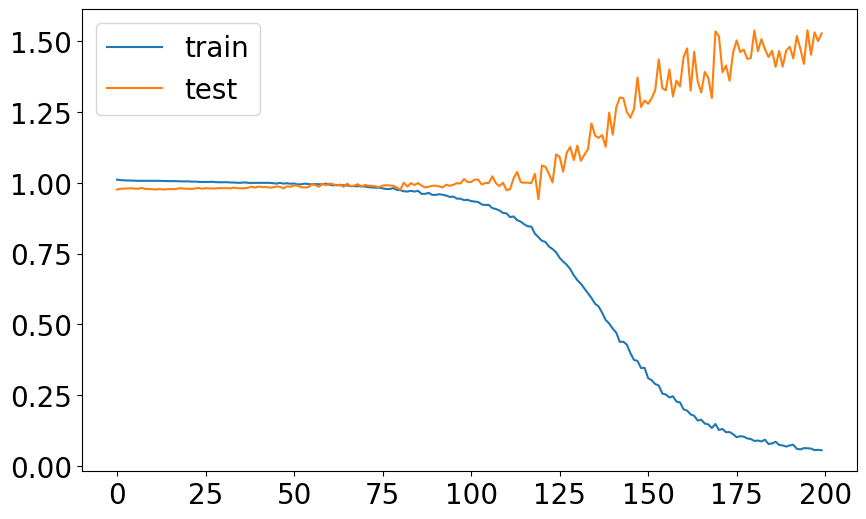

In [ ]:
plt.plot(resultado.history['loss'], label='train')
plt.plot(resultado.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

74/74 [==============================] - 3s 22ms/step


In [ ]:
# model evaluation
from keras.models import load_model

type(y_ajustado)






numpy.ndarray

74/74 [==============================] - 2s 15ms/step


In [ ]:
xtreino_novo.shape, ytreino_novo.shape

((2365, 30, 1), (2365,))

In [ ]:
xteste_novo.shape, yteste_novo.shape

((237, 30, 1), (237,))

In [ ]:
ytreino_novo.shape

(2365,)

ValueError: ignored

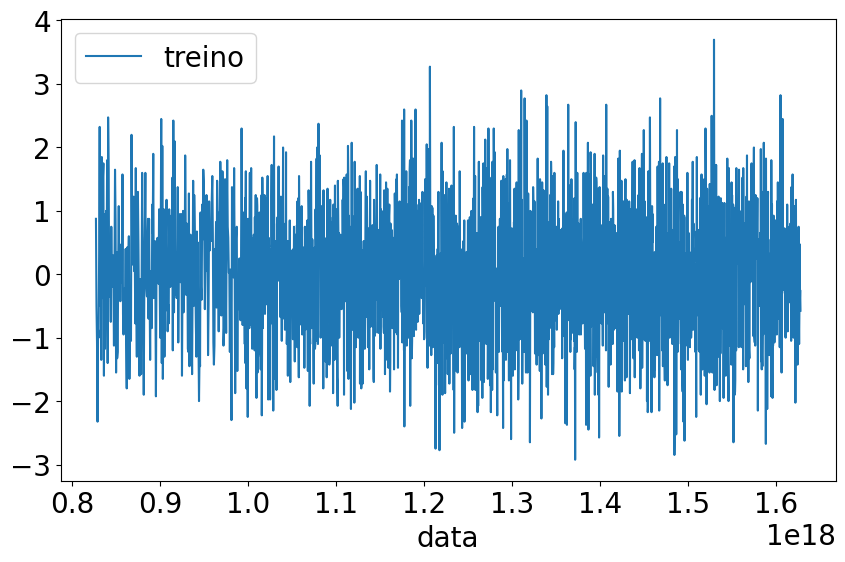

In [ ]:
sns.lineplot(x='data', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='data', y=y_ajustado[:,0], data=bike[0:tamanho_treino], label='ajuste_treino')

In [ ]:
y_predito = recorrente.predict(xteste_novo)

8/8 [==============================] - 0s 13ms/step


In [ ]:
y_predito

In [ ]:
d = {'data':x_treino, 'ATUAL_soma':y_predict[:,0]}

resultados = pd.DataFrame(d)
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)

resultado_transf.columns = ['data', 'ATUAL_soma']

In [ ]:
resultado_transf

,data,ATUAL_soma
0,8.271072e+17,184.878279
1,8.277120e+17,184.877473
2,8.283168e+17,184.876663
3,8.289216e+17,184.875851
4,8.295264e+17,184.875036
...,...,...
2390,1.626826e+18,183.389714
2391,1.627085e+18,183.393295
2392,1.627430e+18,183.398066
2393,1.627690e+18,183.401643


In [ ]:
mpl.rcParams['figure.figsize'] = (30,6)
mpl.rcParams['font.size'] = 15

<Axes: xlabel='data'>

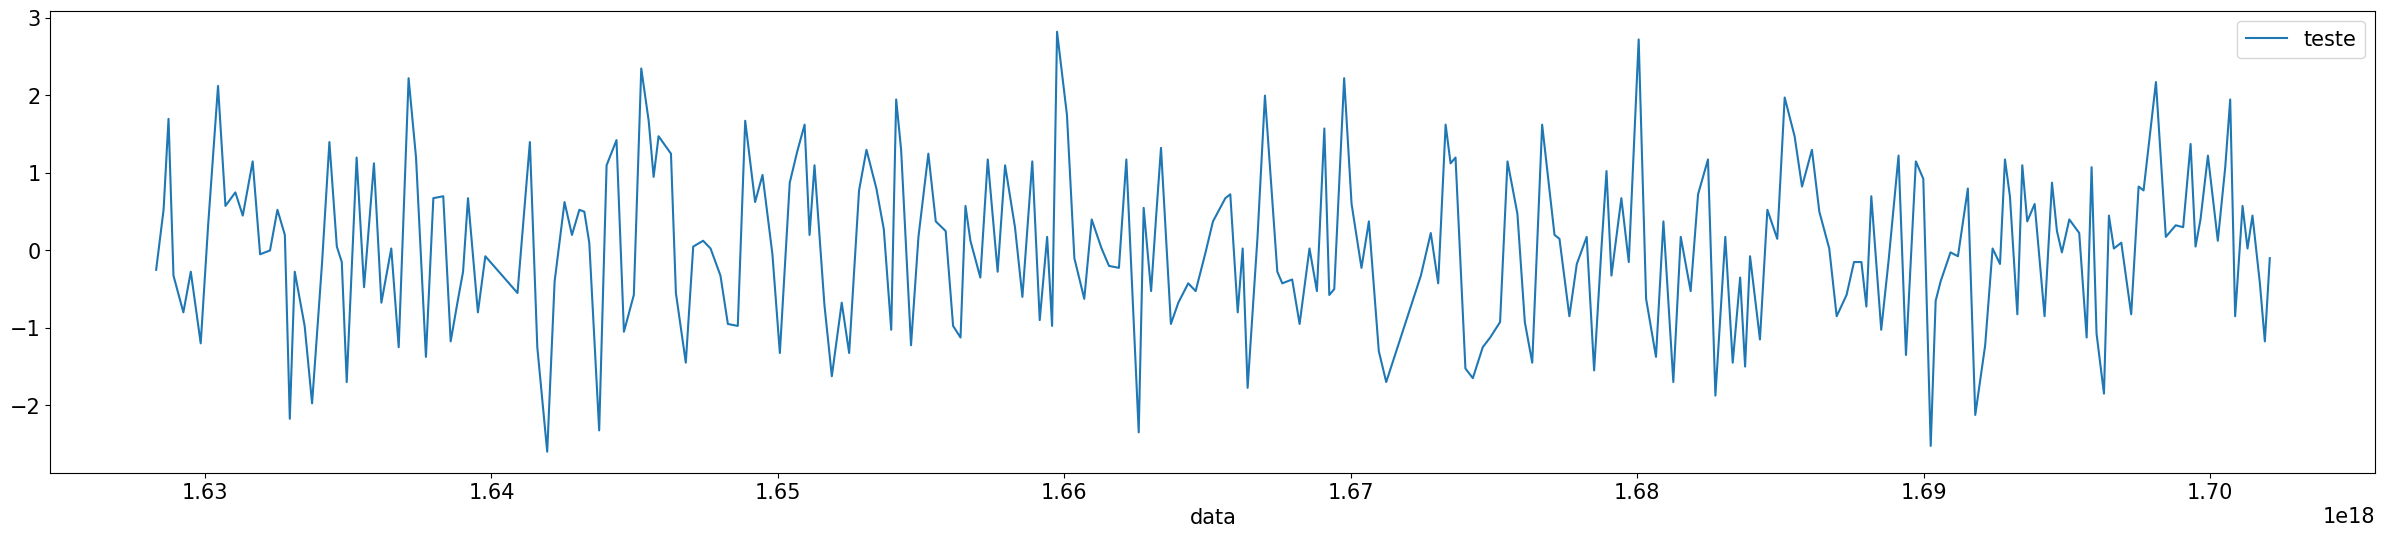

In [ ]:
sns.lineplot(x='data', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label = 'teste')
#sns.lineplot(x='data', y=y_predito[:,0], data=bike[tamanho_treino+30:len(bike)], label = 'predito')
#sns.lineplot(x='data', y='ATUAL_soma', data=resultado_transf, label = 'predito')

# RECORRENTE TIPO GRU

In [ ]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()

In [ ]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [ ]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

# EXTRA

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

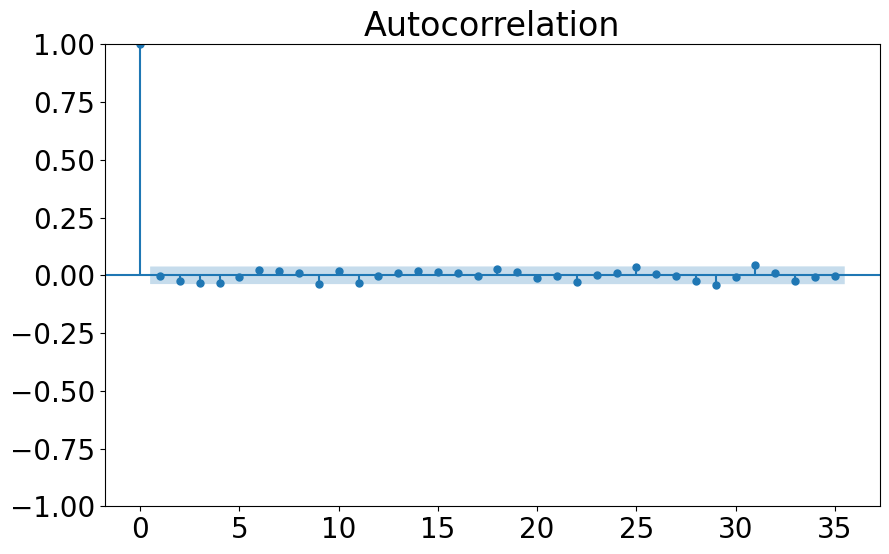

In [ ]:
plot_acf(passageiros['dezena_3'])
pyplot.show()

In [ ]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = passageiros['dezena_3']
# choose a number of time steps
n_steps = 30
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
resultado = model.fit(X, y, epochs=200)

Epoch 1/200
83/83 [==============================] - 4s 15ms/step - loss: 115.4481
Epoch 2/200
83/83 [==============================] - 1s 15ms/step - loss: 102.0272
Epoch 3/200
83/83 [==============================] - 1s 14ms/step - loss: 100.6828
Epoch 4/200
83/83 [==============================] - 1s 14ms/step - loss: 100.9591
Epoch 5/200
83/83 [==============================] - 1s 14ms/step - loss: 100.3824
Epoch 6/200
83/83 [==============================] - 1s 15ms/step - loss: 99.7194
Epoch 7/200
83/83 [==============================] - 1s 16ms/step - loss: 100.0606
Epoch 8/200
83/83 [==============================] - 2s 22ms/step - loss: 99.9635
Epoch 9/200
83/83 [==============================] - 2s 22ms/step - loss: 99.3345
Epoch 10/200
83/83 [==============================] - 1s 15ms/step - loss: 99.0549
Epoch 11/200
83/83 [==============================] - 2s 19ms/step - loss: 99.6821
Epoch 12/200
83/83 [==============================] - 2s 23ms/step - loss: 100.1425
Epoch 

In [ ]:
y_predito = model.predict(X)

83/83 [==============================] - 1s 6ms/step


In [ ]:
y_predito

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
# converting categorical variables in y_train to numerical variables
y_test_dummies = pd.get_dummies(y).values
print('Shape of Label tensor: ', y_test_dummies.shape)


# model evaluation
from keras.models import load_model

#model = load_model('MusicalInstrumentReviews.h5')
scores = model.evaluate(X, y)

Shape of Label tensor:  (2632, 52)
83/83 [==============================] - 1s 6ms/step - loss: nan


In [ ]:
scores

nan

In [ ]:
# demonstrate prediction
x_input = array([46, 13, 35, 31, 27, 17, 21, 29, 8, 30])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

ValueError: ignored